In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree 
import graphviz 
from sklearn import preprocessing
#%matplotlib
from sklearn.neural_network import MLPRegressor

In [332]:
# #np.polyfit使用例程
# x = np.linspace(start=0.4,stop=0.15,num=1000)
# #曲线A
# z1 = np.polyfit(df_loss.values[:,0], df_loss.values[:,1], 3)
# p1 = np.poly1d(z1) #使用次数合成多项式
# y_pre = p1(x)
# plt.plot(x,y_pre)

#导入表一数据并进行预处理
# df1 = pd.read_excel("1.xlsx")
# df1 = df1.dropna()#抛弃丢失值
# df1 = df1.iloc[:,1:]
# df1 = pd.get_dummies(df1)#独热编码，并且删除倒数第二列，即label为1时表示有风化，label为0时表示无风化
# temp = df1.iloc[:,-1]
# df1 = df1.iloc[:,:-2]
# df1 = df1.join(temp)

In [333]:
df_impr = pd.read_excel("2_1_new.xlsx")
xtemp = pd.get_dummies(df_impr.iloc[:,-4:])
ytemp = df_impr.iloc[:,1:-4]
#xtemp = sm.add_constant(xtemp)
model = sm.OLS(ytemp.iloc[:,11],xtemp)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               氧化锶(SrO)   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3.326
Date:                Sun, 18 Sep 2022   Prob (F-statistic):            0.00117
Time:                        18:41:34   Log-Likelihood:                 12.375
No. Observations:                  67   AIC:                             1.251
Df Residuals:                      54   BIC:                             29.91
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
表面风化           0.0176      0.087      0.202      0.840      -0.157       0.192
类别            -0.2122      0.116     -1.830      0.073      -0.445       0.020
纹饰_A           0.1648      0.059      2.809      0.007       0.047       0.282
纹饰_B           0.1664      0.158      1.053      0.297      -0.150       0.483
纹饰_C           0.2453      0.069      3.534      0.001       0.106       0.384
颜色_0           0.0076      0.221      0.034      0.973      -0.436       0.451
颜色_浅绿         -0.0945      0.130     -0.724      0.472      -0.356       0.167
颜色_浅蓝          0.1437      0.066      2.167      0.035       0.011       0.277
颜色_深绿          0.0278      0.095      0.293      0.771      -0.163       0.218
颜色_深蓝          0.2059      0.132      1.566      0.123      -0.058       0.470
颜色_紫           0.2730      0.100      2.732      0.008       0.073       0.473
颜色_绿          -0.2453      0.216     -1.136      0.261      -0.678       0.188
颜色_蓝绿          0.0282      0.101      0.279      0.781      -0.175       0.231
颜色_黑           0.2301      0.132      1.736      0.088      -0.036       0.496
==============================================================================
Omnibus:                       16.023   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.507
Skew:                           0.996   Prob(JB):                     3.52e-05
Kurtosis:                       4.838   Cond. No.                     7.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [334]:
#第一题第三问多元线性回归
df_train = pd.read_excel("train5.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]

In [335]:
y_train
x_train

,类别_铅钡,类别_高钾,纹饰_A,纹饰_C,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_蓝绿
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1
5,0,1,1,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,0,1
7,0,1,1,0,0,0,0,0,0,1
8,0,1,1,0,0,0,0,0,0,1
9,1,0,0,1,1,0,0,0,0,0


In [336]:
test = x_train.iloc[:,4:]
y_train.shape
x_train.shape

(16, 10)

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


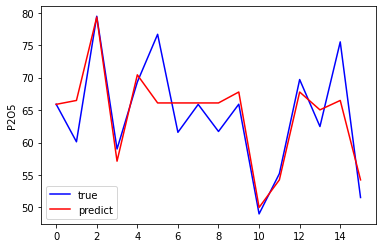

0.7291829329715906


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


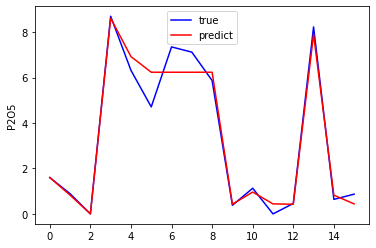

0.967544405124085


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


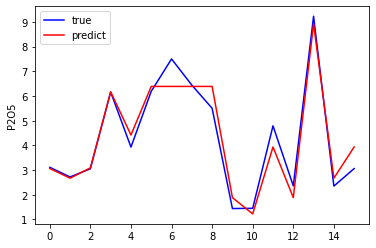

0.9431077535447983


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


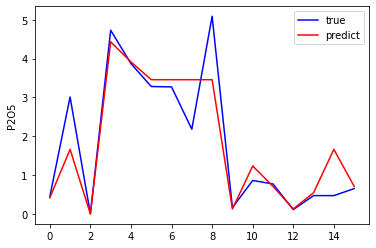

0.8332868204827487


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


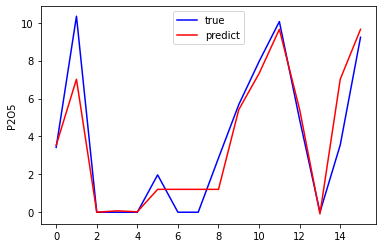

0.8644625307522921


In [337]:
#2022年9月18日10:04:02基于神经网络对预测效果的优化

#x_train = sm.add_constant(x_train)

#model = sm.GLS(y_train.iloc[:,0],x_train)
#result = model.fit()
#result.summary()
df_train = pd.read_excel("train5.xlsx")
#df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]
for i in range(5):
    model_mlp = MLPRegressor(
        hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
        random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
        early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

    model_mlp.fit(x_train,y_train.iloc[:,i])
    pred = model_mlp.predict(x_train)
    #x_train = x_train.reshape(-1,1)
    mlp_score=model_mlp.score(x_train.values,y_train.iloc[:,i].values)
    mlp_score
    draw, = plt.plot(y_train.iloc[:,i], 'b')
    draw.set_label("true")
    draw, = plt.plot(pred, 'r')
    draw.set_label("predict")
    #plt.plot(x1, result, 'ro')
    draw.set_label("predict")
    plt.ylabel('P2O5')
    plt.legend()
    plt.show()
    print(mlp_score)


In [338]:
df_pred.iloc[:,1:]

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),合计,表面风化,类别,纹饰,颜色,预测SiO2
0,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00,99.89,风化,铅钡,A,浅蓝,54.315601
1,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00,99.70,风化,高钾,B,蓝绿,16.278331
2,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58,99.82,风化,铅钡,C,紫,86.764714
3,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03,98.24,风化,铅钡,C,紫,87.264474
4,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00,99.77,风化,高钾,B,蓝绿,16.243558
5,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00,99.81,风化,高钾,B,蓝绿,17.617990
6,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00,95.39,风化,铅钡,C,浅蓝,59.893686
7,94.29,0.00,1.01,0.72,0.00,1.46,0.29,1.65,0.00,0.00,0.15,0.00,0.00,0.00,99.57,风化,高钾,B,蓝绿,17.796846
8,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00,98.76,风化,铅钡,A,浅蓝,52.491896
9,92.35,0.00,0.74,1.66,0.64,3.50,0.35,0.55,0.00,0.00,0.21,0.00,0.00,0.00,100.00,风化,高钾,B,蓝绿,15.485929


In [339]:
df_pred = pd.read_excel("test_test.xlsx")
df_pred.loc[:,['二氧化硅(SiO2)','氧化钙(CaO)','氧化铝(Al2O3)','氧化铜(CuO)','氧化钡(BaO)','五氧化二磷(P2O5)']]

,二氧化硅(SiO2),氧化钙(CaO),氧化铝(Al2O3),氧化铜(CuO),氧化钡(BaO),五氧化二磷(P2O5)
0,36.28,2.34,5.73,0.26,0.00,3.57
1,92.63,1.07,1.98,3.24,0.00,0.61
2,20.14,1.48,1.34,10.41,31.23,3.59
3,4.61,3.19,1.11,3.14,30.62,7.56
4,95.02,0.62,1.32,1.55,0.00,0.35
5,96.77,0.21,0.81,0.84,0.00,0.00
6,33.59,3.51,2.69,4.93,14.61,9.38
7,94.29,0.72,1.46,1.65,0.00,0.15
8,29.64,2.93,3.57,3.51,5.35,8.83
9,92.35,1.66,3.50,0.55,0.00,0.21


In [342]:
# w = np.array(result.params)
# pred = x_train.values*w
# pred = pred.sum(axis=1)
# x = np.arange(1,17)
# plt.plot(x,pred,'b')
# plt.plot(x,y_train.iloc[:,0].values,'r')
# plt.show()

In [344]:
#进行风化样本的预测
df_pred = pd.read_excel("test_test.xlsx")

In [345]:
df_pred = pd.read_excel("test_test.xlsx")
df_pred = df_pred.dropna()
x_pred = pd.get_dummies(df_pred.iloc[:,-4:])
y_pred = df_train.iloc[:,1:-5]

In [346]:
x_pred = x_pred.iloc[:,1:]
x_pred

,类别_铅钡,类别_高钾,纹饰_A,纹饰_B,纹饰_C,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_紫,颜色_蓝绿,颜色_黑
0,1,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,0
5,0,1,0,1,0,0,0,0,0,1,0
6,1,0,0,0,1,0,1,0,0,0,0
7,0,1,0,1,0,0,0,0,0,1,0
8,1,0,1,0,0,0,1,0,0,0,0
9,0,1,0,1,0,0,0,0,0,1,0


In [347]:
x_pred = x_pred.drop(labels=["纹饰_B"],axis = 1)

In [348]:
w

array([0.94105583, 0.88245123, 0.91247829, 0.95657924, 0.92914516,
       0.94592981, 0.91610475, 0.92718159, 0.97269554, 0.9536275 ,
       0.93650384, 0.9554802 , 0.88464863, 0.89391412])

In [349]:
# y_pred = x_pred.values*w

In [350]:
# y_pred = y_pred.sum(axis=1)

In [351]:
# bias = np.random.normal(loc=0.0, scale=1.0, size=[y_pred.shape[0]])

In [352]:
# y_pred = y_pred + bias
# y_pred

In [353]:
Outer = pd.DataFrame(y_pred,columns=["预测"])
Outer.to_excel(excel_writer=r"2022数据处理2.xlsx")

In [354]:
#五氧化二磷
df_train = pd.read_excel("train6.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
y_train = df_train.iloc[:,1:-5]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
#x_train = sm.add_constant(x_train)



model = sm.GLS(y_train.iloc[:,10],x_train)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:            五氧化二磷(P2O5)   R-squared:                       0.144
Model:                            GLS   Adj. R-squared:                 -0.285
Method:                 Least Squares   F-statistic:                    0.3354
Date:                Sun, 18 Sep 2022   Prob (F-statistic):              0.939
Time:                        18:41:54   Log-Likelihood:                -43.109
No. Observations:                  25   AIC:                             104.2
Df Residuals:                      16   BIC:                             115.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
类别_铅钡          0.3788      0.903      0.419      0.681      -1.536       2.294
类别_高钾          0.3267      1.434      0.228      0.823      -2.713       3.366
纹饰_A           0.7344      1.489      0.493      0.628      -2.422       3.890
纹饰_C          -0.0288      0.903     -0.032      0.975      -1.944       1.886
颜色_浅绿         -0.0550      2.078     -0.026      0.979      -4.460       4.350
颜色_浅蓝          0.3785      2.185      0.173      0.865      -4.253       5.010
颜色_深绿          0.2507      2.002      0.125      0.902      -3.994       4.495
颜色_深蓝         -0.1725      2.549     -0.068      0.947      -5.577       5.232
颜色_紫           0.5300      2.078      0.255      0.802      -3.875       4.935
颜色_蓝绿          0.7893      2.801      0.282      0.782      -5.149       6.728
==============================================================================
Omnibus:                       14.343   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.850
Skew:                           1.511   Prob(JB):                     0.000983
Kurtosis:                       5.040   Cond. No.                     1.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

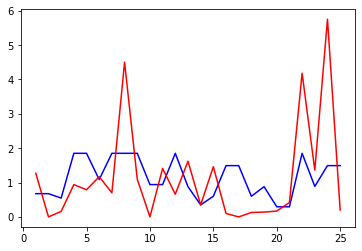

In [355]:
#画图
w = np.array(result.params)
pred = x_train.values*w
pred = pred.sum(axis=1)
x = np.arange(1,26)
plt.plot(x,pred,'b')
plt.plot(x,y_train.iloc[:,10].values,'r')
plt.show()

In [356]:
#预测
y_pred = x_pred.values*w
y_pred = y_pred.sum(axis=1)
bias = np.random.normal(loc=0.0, scale=1.0, size=[y_pred.shape[0]])
y_pred = y_pred + bias
y_pred

array([ 2.22076096,  0.33037844,  0.39259499, -0.09085234,  1.65256257,
       -0.08862478, -0.0935531 , -1.08865155,  0.72846316,  0.36582105,
        0.93657153,  1.27100234,  1.20523816, -1.21901263,  0.01847395,
        3.3429072 ,  1.53289122,  0.06656071,  1.60651097,  1.256269  ,
        1.10053629,  0.81113496,  0.19212087,  0.98302741,  3.49989922,
        1.83551264,  0.71373345,  1.46998503,  2.41894731,  0.56073818,
        4.01316207,  1.11029288,  2.66124009,  1.51979223,  1.32132008,
        0.5291549 ,  2.14318498,  2.90985766,  1.51613617,  1.56450153,
        0.74567158,  0.95081674])

In [357]:
x_pred

,类别_铅钡,类别_高钾,纹饰_A,纹饰_C,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_紫,颜色_蓝绿,颜色_黑
0,1,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,1,0
6,1,0,0,1,0,1,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,1,0,1,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,1,0


In [358]:
#导出数据
Outer = pd.DataFrame(y_pred,columns=["预测五氧化二磷"])
Outer.to_excel(excel_writer=r"2022数据处理3.xlsx")

In [359]:
#氧化钙
df_train = pd.read_excel("train6.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]
x_train = sm.add_constant(x_train)
model = sm.GLS(y_train.iloc[:,5],x_train)
result = model.fit()
result.summary()


# num=5#氧化
# model_mlp = MLPRegressor(
#     hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
#     learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
#     random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
#     early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

# model_mlp.fit(x_train,y_train.iloc[:,num])
# pred = model_mlp.predict(x_train)
# #x_train = x_train.reshape(-1,1)
# mlp_score=model_mlp.score(x_train.values,y_train.iloc[:,num].values)
# mlp_score
# plt.plot(y_train.iloc[:,num], 'b')
# plt.plot(pred, 'r')
# #plt.plot(x1, result, 'ro')
# plt.show()
# print(mlp_score)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:             氧化铝(Al2O3)   R-squared:                       0.606
Model:                            GLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     3.070
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0268
Time:                        18:41:55   Log-Likelihood:                -47.397
No. Observations:                  25   AIC:                             112.8
Df Residuals:                      16   BIC:                             123.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1864      1.216      1.798      0.091      -0.392       4.765
类别_铅钡         -0.6169      0.691     -0.893      0.385      -2.082       0.848
类别_高钾          2.8033      1.162      2.412      0.028       0.339       5.268
纹饰_A           2.3059      1.233      1.870      0.080      -0.308       4.920
纹饰_C          -0.1195      0.731     -0.164      0.872      -1.669       1.430
颜色_浅绿          0.4500      2.467      0.182      0.858      -4.779       5.679
颜色_浅蓝          0.8997      2.594      0.347      0.733      -4.599       6.398
颜色_深绿          2.1766      2.377      0.916      0.373      -2.862       7.216
颜色_深蓝         -1.2621      3.026     -0.417      0.682      -7.677       5.153
颜色_紫           0.9000      2.467      0.365      0.720      -4.329       6.129
颜色_蓝绿         -0.1399      3.325     -0.042      0.967      -7.189       6.910
==============================================================================
Omnibus:                        1.450   Durbin-Watson:                   2.747
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.564
Skew:                           0.341   Prob(JB):                        0.754
Kurtosis:                       3.277   Cond. No.                     1.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

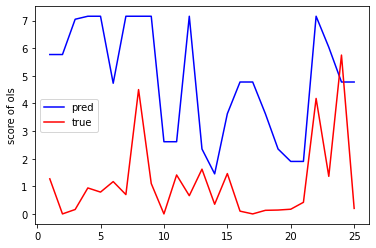

In [360]:
#画图
w = np.array(result.params)
pred = x_train.values*w
pred = pred.sum(axis=1)
x = np.arange(1,26)
draw, = plt.plot(x,pred,'b')
draw.set_label("pred")
draw, =  plt.plot(x,y_train.iloc[:,10].values,'r')
draw.set_label("true")
plt.ylabel("score of ols")
plt.legend()
plt.show()

In [363]:
#预测
y_pred = x_pred.values*w[:-1]
y_pred = y_pred.sum(axis=1)
bias = np.random.normal(loc=0.0, scale=1.0, size=[y_pred.shape[0]])
y_pred = y_pred + bias
y_pred

array([ 6.28730683, -0.64414062,  5.1119873 ,  5.68561454, -1.23060315,
       -2.93123605,  4.79196591, -2.37014839,  3.98925807, -3.05578049,
        3.89020989,  5.77609077,  5.99449262,  6.70909919, -2.16619102,
        4.5436772 ,  4.86938973,  4.8848533 ,  3.90440941,  4.59821842,
        4.88787996,  5.8650978 ,  6.3834526 ,  5.80526293,  5.76363854,
        5.97703434,  4.74022376,  5.48800958,  4.84261716,  7.17716035,
        6.17138225,  5.55257086,  6.4970553 ,  4.65748955,  5.50921745,
        3.29199112,  6.13899708,  6.32915204,  3.50000188,  3.02614587,
        4.04795408,  4.35666188])

In [364]:
#导出数据
Outer = pd.DataFrame(y_pred,columns=["预测氧化钙"])
Outer.to_excel(excel_writer=r"2022数据处理4.xlsx")

                            GLS Regression Results                            
Dep. Variable:               氧化铜(CuO)   R-squared:                       0.484
Model:                            GLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1.760
Date:                Sun, 18 Sep 2022   Prob (F-statistic):              0.164
Time:                        18:42:02   Log-Likelihood:                -38.271
No. Observations:                  24   AIC:                             94.54
Df Residuals:                      15   BIC:                             105.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
类别_铅钡          0.1780      0.803      0.222      0.8

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


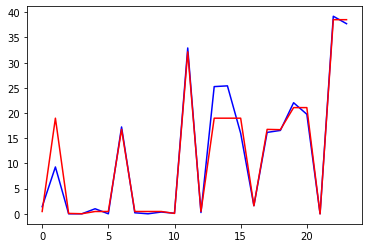

0.9532219207392215


In [365]:
#预测氧化铜
df_train = pd.read_excel("train7.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]
model = sm.GLS(y_train.iloc[:,7],x_train)
result = model.fit()
print(result.summary())

num=8#氧化铅
model_mlp = MLPRegressor(
    hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

model_mlp.fit(x_train,y_train.iloc[:,num])
pred = model_mlp.predict(x_train)
#x_train = x_train.reshape(-1,1)
mlp_score=model_mlp.score(x_train.values,y_train.iloc[:,num].values)
mlp_score
plt.plot(y_train.iloc[:,num], 'b')
plt.plot(pred, 'r')
#plt.plot(x1, result, 'ro')
plt.show()
print(mlp_score)

                            GLS Regression Results                            
Dep. Variable:             氧化铝(Al2O3)   R-squared:                       0.585
Model:                            GLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2.641
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0500
Time:                        18:42:03   Log-Likelihood:                -45.776
No. Observations:                  24   AIC:                             109.6
Df Residuals:                      15   BIC:                             120.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
类别_铅钡          0.4763      1.098      0.434      0.6

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


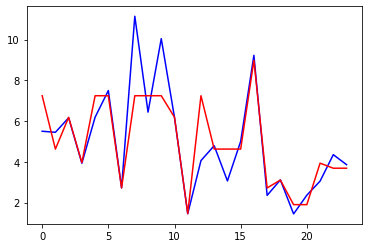

0.7179727174238146


In [366]:
#预测氧化铝
df_train = pd.read_excel("train7.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]
model = sm.GLS(y_train.iloc[:,5],x_train)
result = model.fit()
print(result.summary())

num=5#氧化吕
model_mlp = MLPRegressor(
    hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

model_mlp.fit(x_train,y_train.iloc[:,num])
pred = model_mlp.predict(x_train)
#x_train = x_train.reshape(-1,1)
mlp_score=model_mlp.score(x_train.values,y_train.iloc[:,num].values)
mlp_score
plt.plot(y_train.iloc[:,num], 'b')
plt.plot(pred, 'r')
#plt.plot(x1, result, 'ro')
plt.show()
print(mlp_score)

In [369]:
#预测
y_pred = x_pred.values*w[:-1]
y_pred = y_pred.sum(axis=1)
bias = np.random.normal(loc=0.0, scale=1.0, size=[y_pred.shape[0]])
y_pred = y_pred + bias
y_pred

array([ 5.77573608, -2.19069998,  7.43482999,  4.85710944, -1.50447266,
       -0.70704686,  6.35809448, -1.0691083 ,  6.53050929, -0.93754255,
        3.09126163,  5.33674607,  7.68756304,  6.43876588, -0.959522  ,
        5.3622785 ,  4.16788056,  3.74539426,  5.18124002,  5.63660388,
        4.88701598,  6.15448643,  4.74584356,  8.13815961,  6.67711243,
        5.52409113,  5.28640023,  5.6124186 ,  6.49879222,  5.9328018 ,
        6.13440363,  6.23691291,  7.63692413,  3.88888941,  4.11037017,
        4.24237073,  6.15811211,  4.35188858,  6.95676185,  2.84827981,
        2.90264861,  4.45470139])

In [370]:
#导出数据
Outer = pd.DataFrame(y_pred,columns=["预测氧化铜"])
Outer.to_excel(excel_writer=r"2022数据处理5.xlsx")

                            GLS Regression Results                            
Dep. Variable:               氧化钡(BaO)   R-squared:                       0.636
Model:                            GLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3.490
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0160
Time:                        18:42:09   Log-Likelihood:                -71.260
No. Observations:                  25   AIC:                             160.5
Df Residuals:                      16   BIC:                             171.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
类别_铅钡          7.0685      2.786      2.538      0.0

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


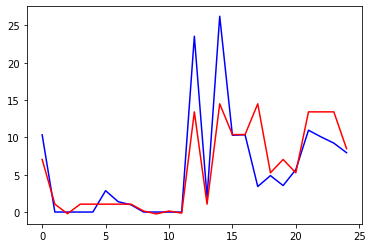

0.6428305191167469


In [371]:
#二氧化硫
df_train = pd.read_excel("train8.xlsx")
df_train = df_train.dropna()
x_train = pd.get_dummies(df_train.iloc[:,-4:])
x_train = x_train.iloc[:,1:]
x_train = x_train.drop(labels=["颜色_绿"],axis=1)
y_train = df_train.iloc[:,1:-5]
model = sm.GLS(y_train.iloc[:,9],x_train)
result = model.fit()
print(result.summary())


num=9#氧化呗
model_mlp = MLPRegressor(
    hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

model_mlp.fit(x_train,y_train.iloc[:,num])
pred = model_mlp.predict(x_train)
#x_train = x_train.reshape(-1,1)
mlp_score=model_mlp.score(x_train.values,y_train.iloc[:,num].values)
mlp_score
plt.plot(y_train.iloc[:,num], 'b')
plt.plot(pred, 'r')
#plt.plot(x1, result, 'ro')
plt.show()
print(mlp_score)

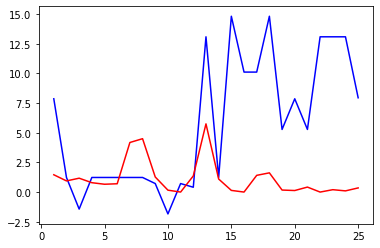

In [372]:
#画图
w = np.array(result.params)
pred = x_train.values*w
pred = pred.sum(axis=1)
x = np.arange(1,26)
plt.plot(x,pred,'b')
plt.plot(x,y_train.iloc[:,10].values,'r')
plt.show()

In [373]:
#预测
y_pred = x_pred.values*w
y_pred = y_pred.sum(axis=1)
bias = np.random.normal(loc=0.0, scale=1.0, size=[y_pred.shape[0]])
y_pred = y_pred + bias
y_pred

array([12.08219497,  4.98662869,  6.40039443,  7.90533989,  2.48875805,
        3.70389883,  9.76432281,  4.50601937, 10.86758148,  3.66124897,
       19.33032377, 10.20780842,  7.63756024,  6.43545633,  3.72846864,
       14.56939729, 13.9063939 ,  7.63438418,  8.34585528,  8.58946376,
        7.71425643, 10.74988994,  4.23443168, 12.380034  , 14.15847541,
       11.58895268, 10.85375155, 12.8586642 , 14.14524279, 12.24449509,
        9.88931692, 10.62905315, 11.84157168,  8.36181133, 11.25871345,
       11.01920535, 13.86948055,  8.81094804,  9.39785511, 15.35961259,
       15.94250917, 11.01186989])

In [374]:
#导出数据
Outer = pd.DataFrame(y_pred,columns=["预测二氧化硫"])
Outer.to_excel(excel_writer=r"2022数据处理6.xlsx")

In [375]:
#读取数据
#风化：1 无风化：0
#高钾：1 铅钡：0     
df_lr = pd.read_excel("2_1_new.xlsx")
df_lr

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),表面风化,类别,纹饰,颜色
0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,0,1,C,蓝绿
1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,1,0,A,浅蓝
2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,0,1,A,蓝绿
3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,0,1,A,蓝绿
4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,0,1,A,蓝绿
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,54严重1点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,1,0,C,浅蓝
63,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,0,0,C,绿
64,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,1,0,C,蓝绿
65,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,1,0,C,蓝绿


In [376]:
x_train_lr = df_lr.iloc[:,1:-4]
y_train_lr = df_lr.iloc[:,-3]
x_train,x_test,y_train,y_test = train_test_split(x_train_lr,y_train_lr,test_size=0.2)

In [377]:
#x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     类别   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              21.51
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                    4.61e-14
Time:                        18:42:13   Log-Likelihood:                          15.640
No. Observations:                  53   AIC:                                     -3.280
Df Residuals:                      39   BIC:                                      24.30
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
二氧化硅(SiO2)      0.0076      0.001      7.526      0.000       0.006       0.010
氧化钠(Na2O)      -0.0334      0.019     -1.759      0.087      -0.072       0.005
氧化钾(K2O)        0.0536      0.014      3.878      0.000       0.026       0.082
氧化钙(CaO)        0.0128      0.021      0.616      0.542      -0.029       0.055
氧化镁(MgO)       -0.0106      0.059     -0.179      0.859      -0.130       0.109
氧化铝(Al2O3)     -0.0209      0.012     -1.782      0.082      -0.045       0.003
氧化铁(Fe2O3)     -0.0035      0.030     -0.119      0.906      -0.063       0.056
氧化铜(CuO)        0.0220      0.025      0.878      0.386      -0.029       0.073
氧化铅(PbO)       -0.0048      0.003     -1.618      0.114      -0.011       0.001
氧化钡(BaO)       -0.0104      0.009     -1.173      0.248      -0.028       0.008
五氧化二磷(P2O5)     0.0091      0.014      0.656      0.516      -0.019       0.037
氧化锶(SrO)        0.0227      0.166      0.137      0.892      -0.312       0.358
氧化锡(SnO2)      -0.0194      0.092     -0.211      0.834      -0.205       0.166
二氧化硫(SO2)       0.0156      0.018      0.863      0.393      -0.021       0.052
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   2.486
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.369
Skew:                          -0.186   Prob(JB):                        0.831
Kurtosis:                       3.169   Cond. No.                         337.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [378]:
#Topsis函数
#Topsis函数定义
#0 极大型 
#1 极小型
#2 中间型 额外标志：Xbest #PS:个人感觉，中间型的转换，本质上是先转换成极小型再转换成极大型
#3 区间型 额外标志：[a,b]区间 #正向化的方法是不唯一的，这里参考网课上的
#正向化
def ForwardDirection(m,y):#m表示输入矩阵，y表示指标类型
    num=len(y)
    for i in range(num):
        #i代表着第i个指标，对应着m的第i列（从0计数）
        labeltype=y[i]
        if(labeltype[0]==0):
            print("第",i+1,"个指标为极大型指标，无需正向化")
        elif(labeltype[0]==1):
            print("第",i+1,"个指标为极小型指标，进行正向化")
            maxnum=np.amax(m,axis=0)#返回每一列元素的最大值
            maxnum=maxnum[i]
            m[:,i]= maxnum-m[:,i]
        elif(labeltype[0]==2):
            print("第",i+1,"个指标为中间型指标，进行正向化")
            xbest=labeltype[1]
            M=np.max(np.abs(m[:,i]-xbest))
            m[:,i]=(1-np.abs(m[:,i]-xbest)/M)
        elif(labeltype[0]==3):
            print("第",i+1,"个指标为区间型指标，进行正向化")
            a=labeltype[1]
            b=labeltype[2]
           # print("a,b:",a,b)
            minx=np.min(m[:,i])
            maxx=np.max(m[:,i])
            #print(m[:,i])
           # print("min,max",minx,maxx)
            M=max(a-minx,maxx-b)
            col=len(m[:,i])
            for j in range(col):
                if(m[j,i]<a):
                    m[j,i]=1-(a-m[j,i])/M
                elif(m[j,i]<=b and m[j,i]>=a):
                    m[j,i]=1
                elif(m[j,i]>b):
                    m[j,i]=1-(m[j,i]-b)/M
    return m

def Standardize(m):#m为输入矩阵，且已经正向化
    
    #第一步，先把m中元素乘方
    temp_all=np.power(m,2)

    #第二步，按列求和得到一个行向量
    temp_all=np.sum(temp_all,axis=0)#在第一个轴展开方向上求和

    #第三步，将行向量元素开方
    temp_all=np.power(temp_all,1/2)

    #第四步，将m中每一列元素除以第三部中行向量对应列元素
    for i in range(len(temp_all)):
        m[:,i]=m[:,i]/temp_all[i]
       
    return m

#计算得分
def getGrade(m,w):#m为输入矩阵，且已经标准化
    
    #第一步，得到每一列的最大值Zmax与最小值Zmin
    Zmax=np.max(m,axis=0)
    Zmin=np.min(m,axis=0)
    
    #第二步，通过ZmaxZmin得到每个样本（即本例中的小王小明等）的每个指标到各个指标最大值的距离与到最小值的距离
        #1.将m中的每一列元素减去Zmax/Zmin中对应列的值
        #2.然后将结果乘方
        #3.按列方向展开求和
        #4.再开方，从而得到每个评价对象（即样本）的Dmax与Dmin（注意：这里的算法我还没有算上权重）
    Dmax = np.subtract(m,Zmax)#Zmax是行向量，这里有广播
   # print(Dmax)
    Dmin = np.subtract(m,Zmin)#同上
    Dmax=np.power(Dmax,2)
    Dmin=np.power(Dmin,2)
    
    Dmax=Dmax*w
    Dmin=Dmin*w
    
    Dmax=np.sum(Dmax,axis=1)
    Dmin=np.sum(Dmin,axis=1)
 
    Dmax=np.power(Dmax,1/2)
    Dmin=np.power(Dmin,1/2)
    #print("Dmax,Dmin",Dmax,"\n",Dmin)
    #第三步，根据公式：分数=到最小值距离/(到最大值距离+到最小值距离)，算出每个评价对象的综合得分S
    S=Dmin/(Dmax+Dmin)
    #print(S)
    #第四步，对得分进行归一化
    S_sum=np.sum(S,axis=0)
    S=S/S_sum
    return S

In [379]:
#读入铅钡数据
df_topsis_qb = pd.read_excel("铅钡Topsis.xlsx")

In [380]:
df_topsis_qb

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),...,五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),表面风化,类别,纹饰,颜色,合计,Topsis得分
0,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,...,3.57,0.19,0.00,0.00,1,0,A,浅蓝,99.89,0.019544
1,08,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,...,3.59,0.37,0.00,2.58,1,0,C,紫,99.82,0.020415
2,08严重1点,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,...,7.56,0.53,0.00,15.03,1,0,C,紫,98.24,0.058659
3,11,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,...,9.38,0.37,0.00,0.00,1,0,C,浅蓝,95.39,0.025860
4,19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,...,8.83,0.19,0.00,0.00,1,0,A,0,98.76,0.025029
5,20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,...,5.75,0.00,0.00,0.00,0,0,A,浅蓝,88.41,0.016837
6,23未1点,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,...,0.00,0.33,0.00,0.00,1,0,A,蓝绿,96.50,0.010931
7,24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,...,0.14,0.91,0.00,0.00,0,0,C,紫,98.88,0.011819
8,25未1点,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,...,0.19,0.20,0.00,0.00,1,0,C,浅蓝,97.06,0.013048
9,26,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,...,3.13,0.45,0.00,1.96,1,0,C,紫,99.82,0.018927


In [381]:
#Topsis成分：二氧化硅 氧化钙 氧化铜 五氧化二磷 二氧化硫
data = df_topsis_qb.loc[:,['二氧化硅(SiO2)','氧化钙(CaO)','氧化铜(CuO)','氧化铅(PbO)','五氧化二磷(P2O5)','二氧化硫(SO2)']]
#考虑到原始数据具有较多0值，故对权重进行处理
w=[[1/6,1/6,1/6,1/6,1/6,1/6]]*data.shape[0]
w=np.array(w)
data=np.array(data,dtype=np.float32)
label=[[1],[0],[1],[0],[0],[0]]
data=ForwardDirection(data,label)
data=Standardize(data)
S=getGrade(data,w)

第 1 个指标为极小型指标，进行正向化
第 2 个指标为极大型指标，无需正向化
第 3 个指标为极小型指标，进行正向化
第 4 个指标为极大型指标，无需正向化
第 5 个指标为极大型指标，无需正向化
第 6 个指标为极大型指标，无需正向化


In [382]:
S_df = pd.DataFrame(S,columns=['Topsis得分'])
S_df.to_excel(excel_writer=r"2022C数据处理Topsis1.xlsx")

In [383]:
#读入高钾数据
df_topsis_gj = pd.read_excel("高钾Topsis.xlsx")

In [384]:
data = df_topsis_gj.loc[:,['二氧化硅(SiO2)','氧化钾(K2O)','氧化钙(CaO)','氧化铝(Al2O3)','五氧化二磷(P2O5)']]
#考虑到原始数据具有较多0值，故对权重进行处理
w=[[1/5,1/5,1/5,1/5,1/5]]*data.shape[0]
w=np.array(w)
data=np.array(data,dtype=np.float32)
label=[[0],[1],[1],[1],[1]]
data=ForwardDirection(data,label)
data=Standardize(data)
S=getGrade(data,w)

第 1 个指标为极大型指标，无需正向化
第 2 个指标为极小型指标，进行正向化
第 3 个指标为极小型指标，进行正向化
第 4 个指标为极小型指标，进行正向化
第 5 个指标为极小型指标，进行正向化


In [385]:
S_df = pd.DataFrame(S,columns=['Topsis得分'])
S_df.to_excel(excel_writer=r"2022C数据处理Topsis0.xlsx")

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  ann.update_bbox_position_size(renderer)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 38078 (\N{CJK UNIFIED IDEOGRAPH-94BE}) missing from current font.
  ann.update_bbox_position_size(renderer)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 38085 (\N{CJK UNIFIED IDEOGRAPH-94C5}) missing from current font.
  ann.update_bbox_position_size(renderer)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 38049 (\N{CJK UNIFIED IDEOGRAPH-94A1}) missing from current font.
  ann.update_bbox_position_size(renderer)


[Text(0.6, 0.8333333333333334, 'X[8] <= 3.525\nentropy = 0.932\nsamples = 46\nvalue = [30, 16]\nclass = 高钾'),
 Text(0.4, 0.5, 'X[0] <= 47.645\nentropy = 0.629\nsamples = 19\nvalue = [3, 16]\nclass = 铅钡'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 高钾'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = 铅钡'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = 高钾')]

F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38078 (\N{CJK UNIFIED IDEOGRAPH-94BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38085 (\N{CJK UNIFIED IDEOGRAPH-94C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38049 (\N{CJK UNIFIED IDEOGRAPH-94A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


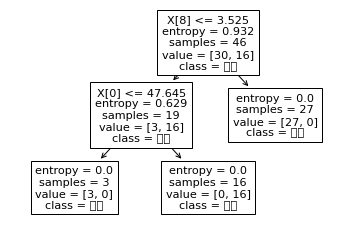

In [386]:
#用决策树进行种类预测
df_tree = pd.read_excel("决策树预测.xlsx")
df_tree = df_tree.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=0.3)
#生成模型
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  max_depth=5)

clf = clf.fit(x_train,y_train)
result = clf.score(x_test,y_test) 
feature_name = ['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钾(K2O)','氧化钙(CaO)','氧化镁(MgO)','氧化铝(Al2O3)',
                '氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)','氧化钡(BaO)','五氧化二磷(P2O5)','氧化锶(SrO)',
                '氧化锡(SnO2)','二氧化硫(SO2)','表面风化']
tree.plot_tree(clf,class_names=['高钾','铅钡'])

In [387]:
x_train

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),表面风化
60,63.66,3.04,0.11,0.78,1.14,6.06,0.00,0.54,8.99,0.00,0.27,0.00,0.00,1
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,2.86,0.70,0.10,0.00,0.00,0
18,79.46,0.00,9.42,0.00,1.53,3.05,0.00,0.00,0.00,1.36,0.07,2.36,0.00,0
13,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,14.61,9.38,0.37,0.00,0.00,1
15,59.01,2.86,12.53,8.70,0.00,6.16,2.88,4.73,0.00,1.27,0.00,0.00,0.00,0
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,10.96,0.00,0.23,0.00,0.00,0
21,76.68,0.00,0.00,4.71,1.22,6.19,2.37,3.28,1.97,1.10,0.00,0.00,0.00,0
46,12.41,0.00,0.00,5.24,0.89,2.25,0.76,5.35,7.29,0.00,0.64,0.00,0.00,1
14,94.29,0.00,1.01,0.72,0.00,1.46,0.29,1.65,0.00,0.15,0.00,0.00,0.00,1
54,54.61,0.00,0.30,2.08,1.20,6.50,1.27,0.45,4.19,4.32,0.30,0.00,0.00,1


In [388]:
[*zip(feature_name,clf.feature_importances_)] 

[('二氧化硅(SiO2)', 0.27883710184930816),
 ('氧化钠(Na2O)', 0.0),
 ('氧化钾(K2O)', 0.0),
 ('氧化钙(CaO)', 0.0),
 ('氧化镁(MgO)', 0.0),
 ('氧化铝(Al2O3)', 0.0),
 ('氧化铁(Fe2O3)', 0.0),
 ('氧化铜(CuO)', 0.0),
 ('氧化铅(PbO)', 0.7211628981506918),
 ('氧化钡(BaO)', 0.0),
 ('五氧化二磷(P2O5)', 0.0),
 ('氧化锶(SrO)', 0.0),
 ('氧化锡(SnO2)', 0.0),
 ('二氧化硫(SO2)', 0.0)]

In [389]:
clf.score(x_test,y_test),clf.score(x_train,y_train)

(0.9047619047619048, 1.0)

In [390]:
#针对树深度的灵敏度分析
x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=0.3)
score_train = []
score_test = []
for depth in range(1,10):
    clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  max_depth=depth,
                                  splitter="random")

    clf = clf.fit(x_train,y_train)
    score_train.append(clf.score(x_train,y_train))
    score_test.append(clf.score(x_test,y_test))
score_train,score_test

([0.8043478260869565,
  0.9130434782608695,
  0.9782608695652174,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.8571428571428571,
  0.8571428571428571,
  0.9523809523809523,
  0.9523809523809523,
  0.9523809523809523,
  0.9523809523809523,
  0.9523809523809523,
  0.9523809523809523,
  0.9523809523809523])

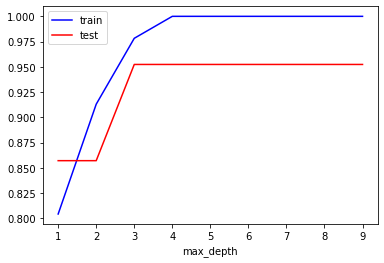

In [391]:
x = [1,2,3,4,5,6,7,8,9]
draw, = plt.plot(x,score_train,'b')
draw.set_label("train")
draw, = plt.plot(x,score_test,'r')
draw.set_label("test")
plt.xlabel('max_depth')
plt.legend()


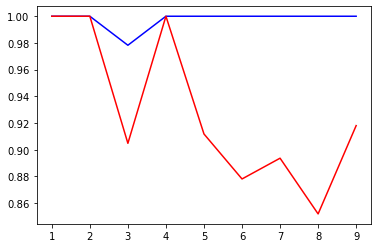

In [392]:
score_train=[]
score_test = []
#针对数据划分的灵敏度分析
for i in np.linspace(0.1,0.9,9):
    x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=i)
    clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  max_depth=5,
                                  splitter="random")

    clf = clf.fit(x_train,y_train)
    score_train.append(clf.score(x_train,y_train))
    score_test.append(clf.score(x_test,y_test))
x = [1,2,3,4,5,6,7,8,9]
plt.plot(x,score_train,'b')
plt.plot(x,score_test,'r')

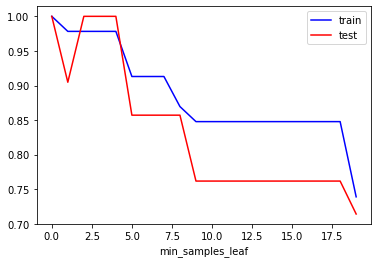

In [393]:
#   ,min_samples_leaf=10,min_samples_split=10  
#针对min_samples_leaf参数进行敏感性分析
x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=0.3)
score_train=[]
score_test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy",
                              random_state=30,
                              max_depth=4,
                              splitter="random",
                                min_samples_leaf=i+1)

    clf = clf.fit(x_train,y_train)
    score_train.append(clf.score(x_train,y_train))
    score_test.append(clf.score(x_test,y_test))
x = np.arange(20)
draw, = plt.plot(x,score_train,'b')
draw.set_label("train")
draw, = plt.plot(x,score_test,'r')
draw.set_label("test")
plt.xlabel('min_samples_leaf')
plt.legend()


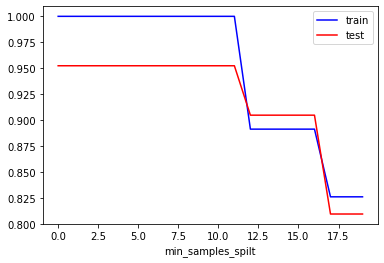

In [394]:
#针对min_samples_spilt参数进行敏感性分析
x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=0.3)
score_train=[]
score_test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion="entropy",
                              random_state=30,
                              max_depth=4,
                              splitter="random",
                                min_samples_split=i+2)

    clf = clf.fit(x_train,y_train)
    score_train.append(clf.score(x_train,y_train))
    score_test.append(clf.score(x_test,y_test))
x = np.arange(20)
draw, = plt.plot(x,score_train,'b')
draw.set_label("train")
draw, = plt.plot(x,score_test,'r')
draw.set_label("test")
plt.xlabel('min_samples_spilt')
plt.legend()

[Text(0.6, 0.875, 'X[8] <= 3.45\nentropy = 0.887\nsamples = 46\nvalue = [32, 14]\nclass = 1'),
 Text(0.4, 0.625, 'X[0] <= 48.045\nentropy = 0.672\nsamples = 17\nvalue = [3, 14]\nclass = 0'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.6, 0.375, 'X[5] <= 12.745\nentropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = 0'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 0'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = 1')]

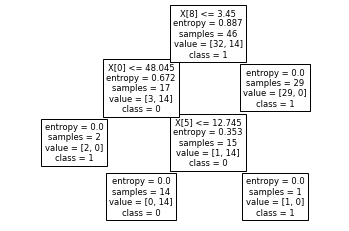

In [395]:
#确定参数maxdp = 5
df_tree = pd.read_excel("决策树预测.xlsx")
df_tree = df_tree.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(df_tree.iloc[:,:-1],df_tree.iloc[:,-1],test_size=0.3)
#生成模型
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  max_depth=5)

clf = clf.fit(x_train,y_train)
result = clf.score(x_test,y_test) 
feature_name = ['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钾(K2O)','氧化钙(CaO)','氧化镁(MgO)','氧化铝(Al2O3)',
                '氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)','氧化钡(BaO)','五氧化二磷(P2O5)','氧化锶(SrO)',
                '氧化锡(SnO2)','二氧化硫(SO2)','表面风化']
tree.plot_tree(clf,class_names=['1','0'])#1:高钾 0：铅钡
#clf.score(x_train,y_train),clf.score(x_test,y_test)

In [396]:
#导入预测数据
df_pred_tree = pd.read_excel("决策树附件3.xlsx")
df_pred_tree

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),表面风化,预测种类,预测种类.1
0,A1,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,1.06,0.03,0.00,0.51,0,1,高钾
1,A2,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,0.00,14.27,0.00,0.00,0.00,1,0,铅钡
2,A3,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,4.69,2.68,0.52,0.00,0.00,0,0,铅钡
3,A4,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,8.31,8.45,0.28,0.00,0.00,0,0,铅钡
4,A5,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,2.16,0.19,0.21,0.49,0.00,1,0,铅钡
5,A6,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.21,0.00,0.00,0.00,1,1,高钾
6,A7,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.13,0.00,0.00,0.11,1,1,高钾
7,A8,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,11.34,1.46,0.31,0.00,2.26,0,0,铅钡


In [397]:
x=df_pred_tree.iloc[:,1:]

In [398]:
x

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),表面风化,预测种类,预测种类.1
0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,1.06,0.03,0.00,0.51,0,1,高钾
1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,0.00,14.27,0.00,0.00,0.00,1,0,铅钡
2,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,4.69,2.68,0.52,0.00,0.00,0,0,铅钡
3,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,8.31,8.45,0.28,0.00,0.00,0,0,铅钡
4,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,2.16,0.19,0.21,0.49,0.00,1,0,铅钡
5,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.21,0.00,0.00,0.00,1,1,高钾
6,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.13,0.00,0.00,0.11,1,1,高钾
7,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,11.34,1.46,0.31,0.00,2.26,0,0,铅钡


In [399]:
clf.predict_proba(x.iloc[:,0:-2])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [400]:
#第四题
df_4 = pd.read_excel("高钾_4.xlsx")

In [401]:
df_4

,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Topsis得分
0,10,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.087738
1,09,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00,0.085482
2,12,94.29,0.00,1.01,0.72,0.00,1.46,0.29,1.65,0.00,0.00,0.15,0.00,0.00,0.00,0.084820
3,07,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00,0.081525
4,27,92.72,0.00,0.00,0.94,0.54,2.51,0.20,1.54,0.00,0.00,0.36,0.00,0.00,0.00,0.081204
5,22,92.35,0.00,0.74,1.66,0.64,3.50,0.35,0.55,0.00,0.00,0.21,0.00,0.00,0.00,0.075782
6,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00,0.065474
7,18,79.46,0.00,9.42,0.00,1.53,3.05,0.00,0.00,0.00,0.00,1.36,0.07,2.36,0.00,0.059996
8,21,76.68,0.00,0.00,4.71,1.22,6.19,2.37,3.28,1.00,1.97,1.10,0.00,0.00,0.00,0.057289
9,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39,0.043907


In [402]:
#消除量纲
df_stand = preprocessing.StandardScaler().fit_transform(df_4.iloc[:,1:])

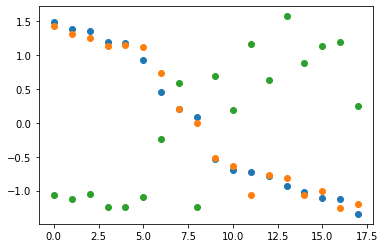

In [403]:
x = np.arange(18)
#topsis
plt.scatter(x,df_stand[:,-1])
#sio2
plt.scatter(x,df_stand[:,0])
#plt.scatter(x,df_stand[:,1])
plt.scatter(x,df_stand[:,2])

In [404]:
#灰色关联手撕
#第一步，数据预处理：每个元素除以均值
#第二步，计算关联系数：
    #1）求每一列特征的两极最小差与两极最大差a与b
    #1.5)求得母与子对应列的绝对差fabs
    #2）定义分辨系数p （超参数，一般为0.5）
    #3）求得子列每个元素的Yi = (a+pb)/(fabs+pb)
    #4）对每一列的Yi求和/n，最终得到每一个特征的关联程度

def gray(df_values,p):

    temp1 = np.sum(df_values,axis=0)#得到每一列的和

    temp1 = temp1/df_values.shape[0]#得到每一列的均值

    df_values = df_values/temp1 #对数据预处理

    #print(df_values)
    df_mother = df_values[:,-1]#母列
    df_son = df_values[:,:-1]#子列
    for i in range(df_son.shape[1]):
        df_son[:,i] = np.fabs(df_son[:,i] - df_mother)
    #print(df_son)
    a=np.min(df_son)#求每一列特征的两极最小差与两极最大差a与b
    b=np.max(df_son)
    #print(a,b)
    df_son = (a+p*b)/(df_son+p*b)
    #print(df_son)
    df_son = np.sum(df_son,axis=0)/df_values.shape[0]
    
    return df_son

In [405]:
df_4 = pd.read_excel("高钾_4.xlsx")
w = gray(df_4.iloc[:,1:].values,0.5)#高钾
w = pd.DataFrame(w,columns=["灰色关联度"])
w.to_excel(excel_writer=r"灰色关联度_高钾.xlsx")

df_4_qb = pd.read_excel("铅钡_4.xlsx")
w = gray(df_4_qb.iloc[:,1:].values,0.5)#高钾
w = pd.DataFrame(w,columns=["灰色关联度"])
w.to_excel(excel_writer=r"灰色关联度_铅钡.xlsx")

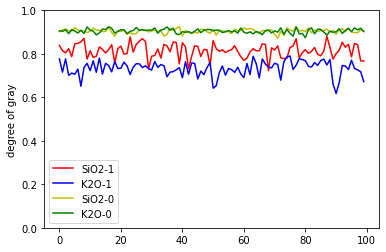

In [406]:
#灰色关联的敏感性分析_二氧化硅——高钾玻璃
df_4 = pd.read_excel("高钾_4.xlsx")
res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[0]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'r')
draw.set_label('SiO2-1')
plt.ylabel("degree of gray")
plt.legend()

res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[2]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'b')
draw.set_label('K2O-1')
plt.ylabel("degree of gray")
plt.legend()
#res

df_4 = pd.read_excel("铅钡_4.xlsx")
res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[2]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'y')
draw.set_label('SiO2-0')
plt.ylabel("degree of gray")
plt.legend()

res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[2]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'g')
draw.set_label('K2O-0')
plt.ylabel("degree of gray")
plt.legend()

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30789 (\N{CJK UNIFIED IDEOGRAPH-7845}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


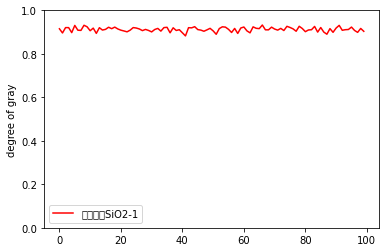

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38048 (\N{CJK UNIFIED IDEOGRAPH-94A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


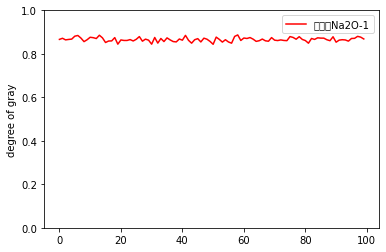

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38078 (\N{CJK UNIFIED IDEOGRAPH-94BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


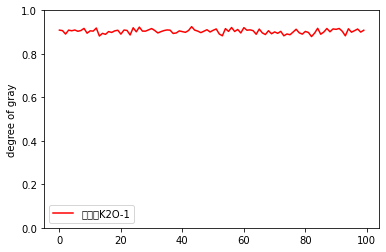

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38041 (\N{CJK UNIFIED IDEOGRAPH-9499}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


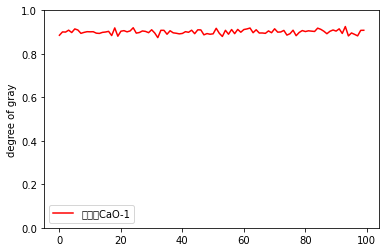

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38209 (\N{CJK UNIFIED IDEOGRAPH-9541}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


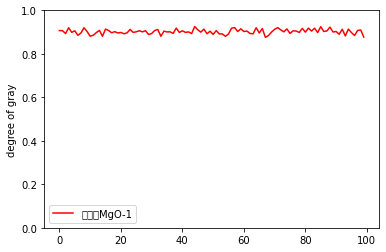

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38109 (\N{CJK UNIFIED IDEOGRAPH-94DD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


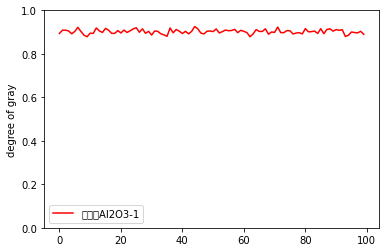

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38081 (\N{CJK UNIFIED IDEOGRAPH-94C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


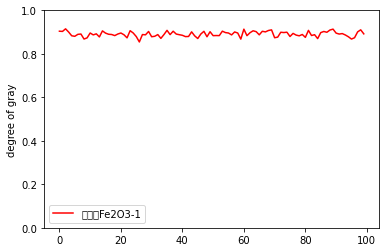

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38108 (\N{CJK UNIFIED IDEOGRAPH-94DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


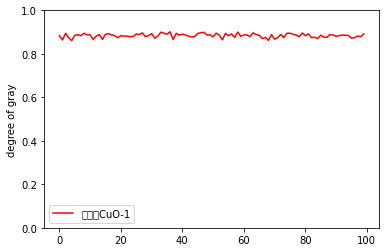

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38085 (\N{CJK UNIFIED IDEOGRAPH-94C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


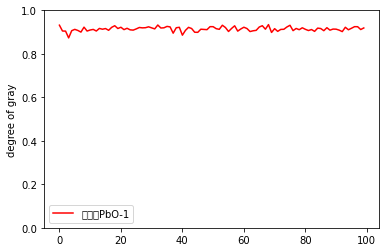

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38049 (\N{CJK UNIFIED IDEOGRAPH-94A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


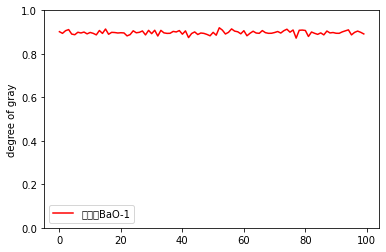

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30967 (\N{CJK UNIFIED IDEOGRAPH-78F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


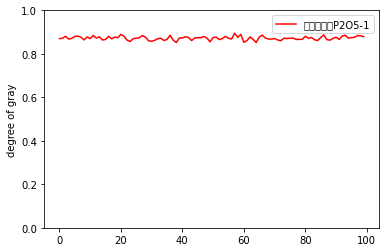

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38198 (\N{CJK UNIFIED IDEOGRAPH-9536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


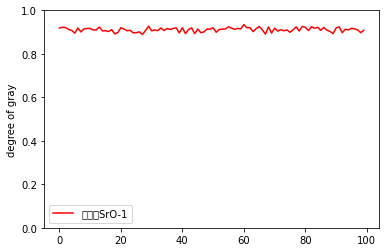

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38177 (\N{CJK UNIFIED IDEOGRAPH-9521}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


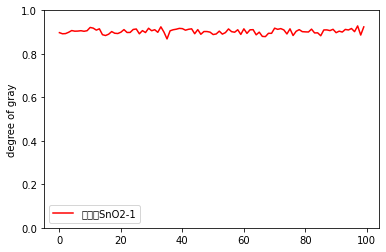

文物采样点


F:\SoftWare\Anconda\envs\MathModeling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30827 (\N{CJK UNIFIED IDEOGRAPH-786B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


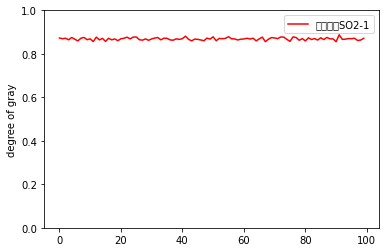

文物采样点


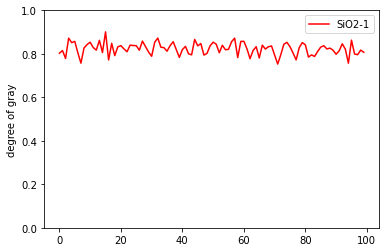

文物采样点


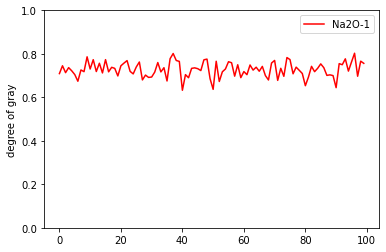

文物采样点


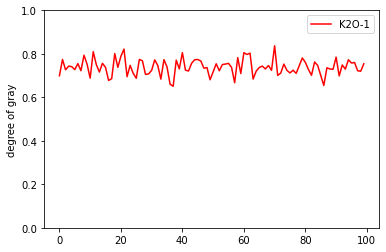

文物采样点


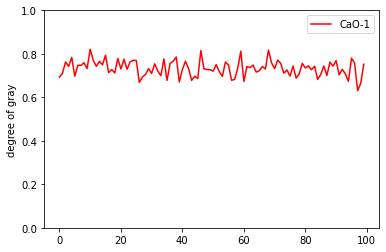

文物采样点


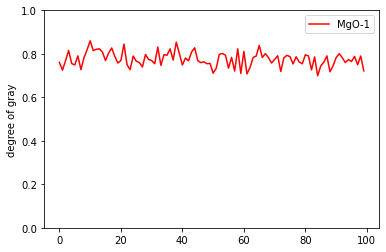

文物采样点


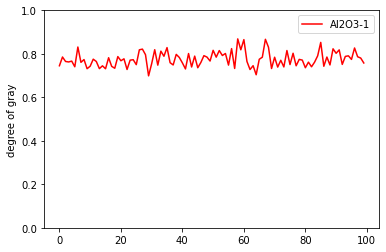

文物采样点


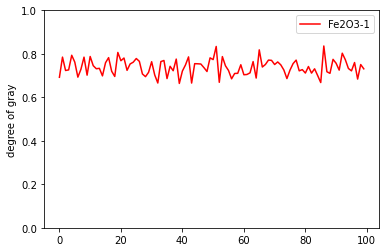

文物采样点


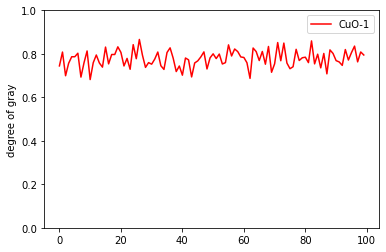

文物采样点


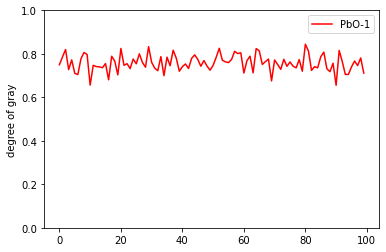

文物采样点


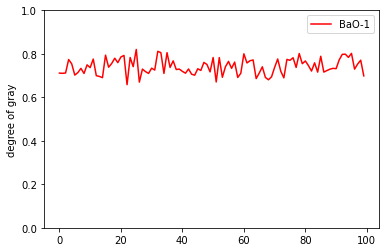

文物采样点


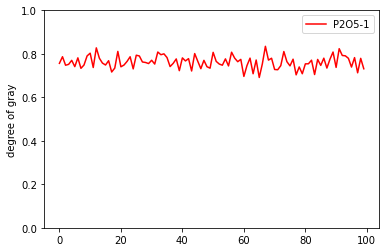

文物采样点


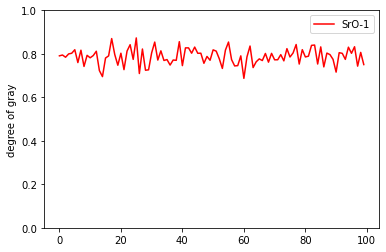

文物采样点


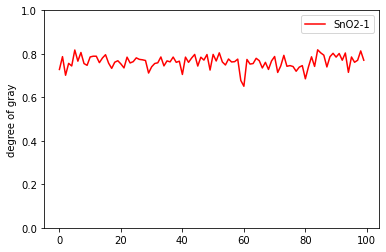

文物采样点


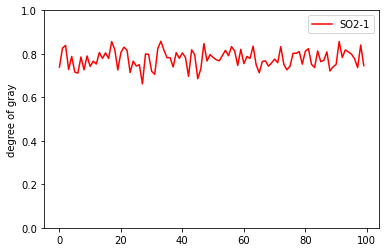

In [407]:
#灰色关联的敏感性分析——氧化钾——高钾玻璃
df_4 = pd.read_excel("铅钡_4.xlsx")
for j in range(14):
    res = []
    x = np.linspace(0.1,2,100)
    bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    data = df_4.iloc[:,1:].values
    for i in x:
        data = df_4.iloc[:,1:].values
        bias = np.random.random([data.shape[0],data.shape[1]])
        #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
        #print(bias)
        data = data+bias
       # print(data)
        w=gray(data,0.5)
        SiO2 = w[j]
        res.append(SiO2)
       # print(np.sum(w))
    plt.ylim(0,1)
    draw, = plt.plot(res,'r')
    print(df_4.iloc[:1:].columns[0])
    draw.set_label(df_4.iloc[:,1:].columns[j]+"-1")
    plt.ylabel("degree of gray")
    plt.legend()
    plt.show()

df_4 = pd.read_excel("高钾_4.xlsx")
for j in range(14):
    res = []
    x = np.linspace(0.1,2,100)
    bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    data = df_4.iloc[:,1:].values
    for i in x:
        data = df_4.iloc[:,1:].values
        bias = np.random.random([data.shape[0],data.shape[1]])
        #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
        #print(bias)
        data = data+bias
       # print(data)
        w=gray(data,0.5)
        SiO2 = w[j]
        res.append(SiO2)
       # print(np.sum(w))
    plt.ylim(0,1)
    draw, = plt.plot(res,'r')
    print(df_4.iloc[:1:].columns[0])
    draw.set_label(df_4.iloc[:,1:].columns[j]+"-1")
    plt.ylabel("degree of gray")
    plt.legend()
    plt.show()
    #res

In [408]:
 print(df_4.iloc[:,1:].columns[0])

SiO2


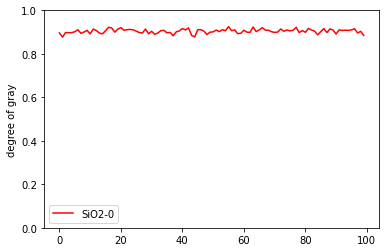

In [409]:
#灰色关联的超参数敏感性分析_二氧化硅——铅钡玻璃
df_4 = pd.read_excel("铅钡_4.xlsx")
res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[2]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'r')
draw.set_label('SiO2-0')
plt.ylabel("degree of gray")
plt.legend()
plt.show()

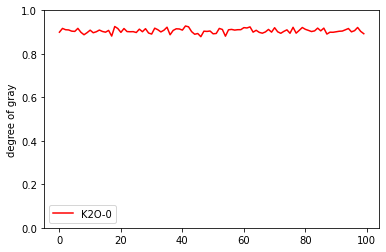

In [410]:
#灰色关联的超参数敏感性分析_氧化钾——铅钡玻璃
df_4 = pd.read_excel("铅钡_4.xlsx")
res = []
x = np.linspace(0.1,2,100)
bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
data = df_4.iloc[:,1:].values
for i in x:
    data = df_4.iloc[:,1:].values
    bias = np.random.random([data.shape[0],data.shape[1]])
    #bias = np.random.normal(loc=0.0, scale=1.0, size=[df_4.iloc[:,1:].values.shape[0],df_4.iloc[:,1:].values.shape[1]])
    #print(bias)
    data = data+bias
   # print(data)
    w=gray(data,0.5)
    SiO2 = w[2]
    res.append(SiO2)
   # print(np.sum(w))
plt.ylim(0,1)
draw, = plt.plot(res,'r')
draw.set_label('K2O-0')
plt.ylabel("degree of gray")
plt.legend()
plt.show()

In [411]:
w = gray(df_4_qb.iloc[:,1:].values,0.5)#铅钡

In [412]:
bias

array([[6.14504573e-01, 3.09673854e-01, 7.48378629e-01, 6.81542729e-01,
        7.01247032e-01, 1.44862580e-01, 9.34495368e-01, 8.85693499e-01,
        5.18233666e-01, 1.14248702e-01, 6.41012360e-01, 9.24552573e-01,
        8.17531179e-01, 8.17427909e-01, 5.52611150e-01],
       [7.57397646e-01, 4.31495408e-01, 4.90341295e-02, 2.36368530e-01,
        4.73444183e-02, 7.04061823e-01, 7.81678578e-01, 5.11144602e-01,
        4.53826691e-01, 4.38650122e-01, 5.30155672e-01, 5.56209413e-01,
        5.96248345e-01, 5.40968394e-01, 9.69915748e-01],
       [3.05477933e-01, 9.62862823e-01, 8.48283716e-01, 7.75022380e-01,
        2.79219791e-01, 5.11420804e-02, 7.32834960e-01, 1.79570433e-01,
        8.40617865e-02, 3.62651955e-01, 5.15154194e-01, 3.07029209e-01,
        4.47527613e-02, 6.80803623e-02, 1.60766933e-01],
       [7.17602603e-01, 4.05896999e-01, 1.49005625e-01, 4.43624904e-01,
        1.07862661e-01, 2.40082205e-01, 6.62452474e-01, 4.37392339e-01,
        2.61783391e-01, 7.12405415e-0

In [413]:
#导入数据——用于神经网络预测
# df_pred_mlp = pd.read_excel("神经网络.xlsx")
# # out = pd.get_dummies(df_pred_mlp.iloc[:,-2])
# # out.to_excel(excel_writer=r"颜色.xlsx")
# x_mlp = pd.get_dummies(df_pred_mlp.iloc[:,-4:])
# y_mlp = pd.get_dummies(df_pred_mlp.iloc[:,1:-4])

df_pred_mlp = pd.read_excel("train5.xlsx")
df_pred_mlp = df_train.dropna()
x_mlp = pd.get_dummies(df_train.iloc[:,-4:])
x_mlp = x_mlp.iloc[:,1:]
x_mlp = x_mlp.drop(labels=["颜色_绿"],axis=1)
y_mlp = df_pred_mlp.iloc[:,1:-5]

# df_pred_mlp = pd.read_excel("train5.xlsx")

# # out = pd.get_dummies(df_pred_mlp.iloc[:,-2])
# # out.to_excel(excel_writer=r"颜色.xlsx")
# x_mlp = pd.get_dummies(df_pred_mlp.iloc[:,-4:])
# y_mlp = pd.get_dummies(df_pred_mlp.iloc[:,1:-4])

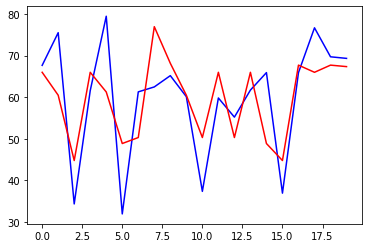

0.4575660907316874


In [415]:
#基于神经网络对预测效果优化的完整过程
x_train_mlp,x_test_mlp,y_train_mlp,y_test_mlp = train_test_split(x_mlp,y_mlp,test_size=0.2)


model_mlp = MLPRegressor(
    hidden_layer_sizes=(18,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=50000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False,  nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08,momentum=0.9)#momentum=0.9,

model_mlp.fit(x_train_mlp,y_train_mlp.iloc[:,0])
pred = model_mlp.predict(x_train_mlp)
mlp_score=model_mlp.score(x_train_mlp,y_train_mlp.iloc[:,0])

plt.plot(y_train_mlp.iloc[:,0].values, 'b')
plt.plot(pred, 'r')
plt.show()
print(mlp_score)